In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
import statsmodels.api as sm

price = pd.read_table('pricelist.csv',delimiter =';')
combi = pd.read_table('Historical_combi2.csv',delimiter =';')

combi=combi.fillna(0)


In [2]:
X = combi[['Dated Brent']]
Y = combi[['Bonny light']]
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

DB= price["Dated brent"]


linear_BL=regr.intercept_+ regr.coef_[0]*DB 
print(linear_BL)

Intercept: 
 [-0.52076158]
Coefficients: 
 [[0.02636947]]
                            OLS Regression Results                            
Dep. Variable:            Bonny light   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     370.7
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.80e-50
Time:                        10:18:33   Log-Likelihood:                -226.59
No. Observations:                 236   AIC:                             457.2
Df Residuals:                     234   BIC:                             464.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [39]:
nonlinear_BL = 0.0164924882990988*(DB) + 4.43302177278368e-5*np.power(DB,2) - 0.157317431833725
print(nonlinear_BL)


0    2.245920
1    2.193252
2    2.114915
3    2.140939
4    1.057656
5    1.101989
Name: Dated brent, dtype: float64


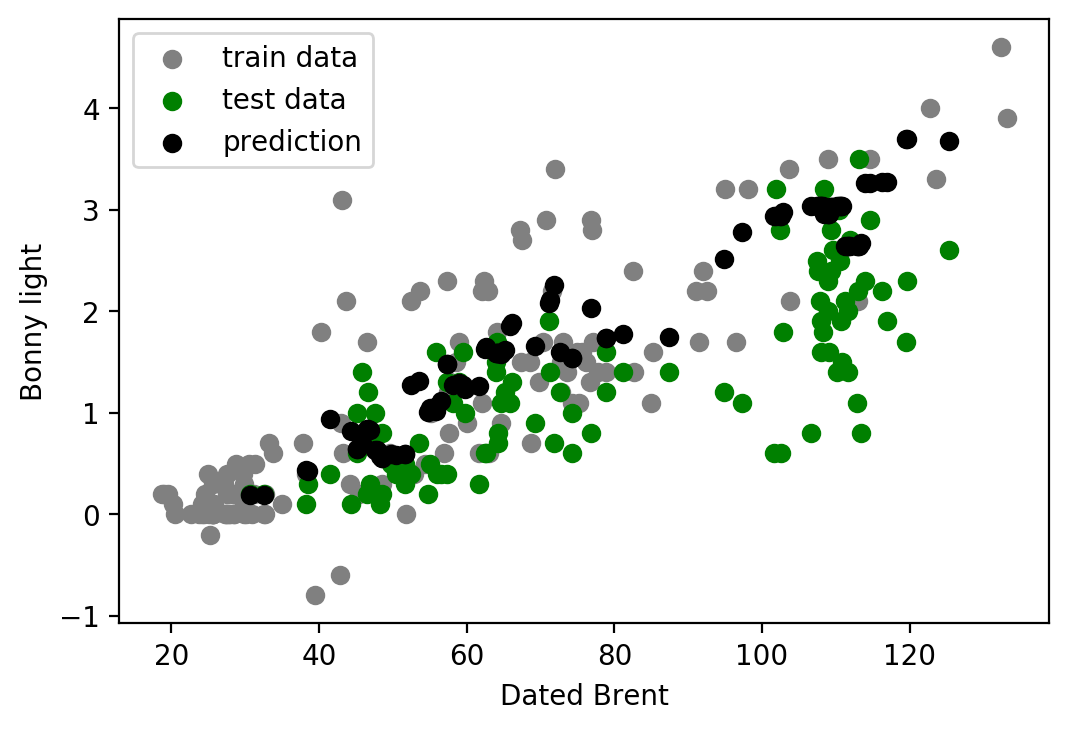

Mean squared error: 0.18
Feature ranking:
Feature Dated Brent (1.000000)


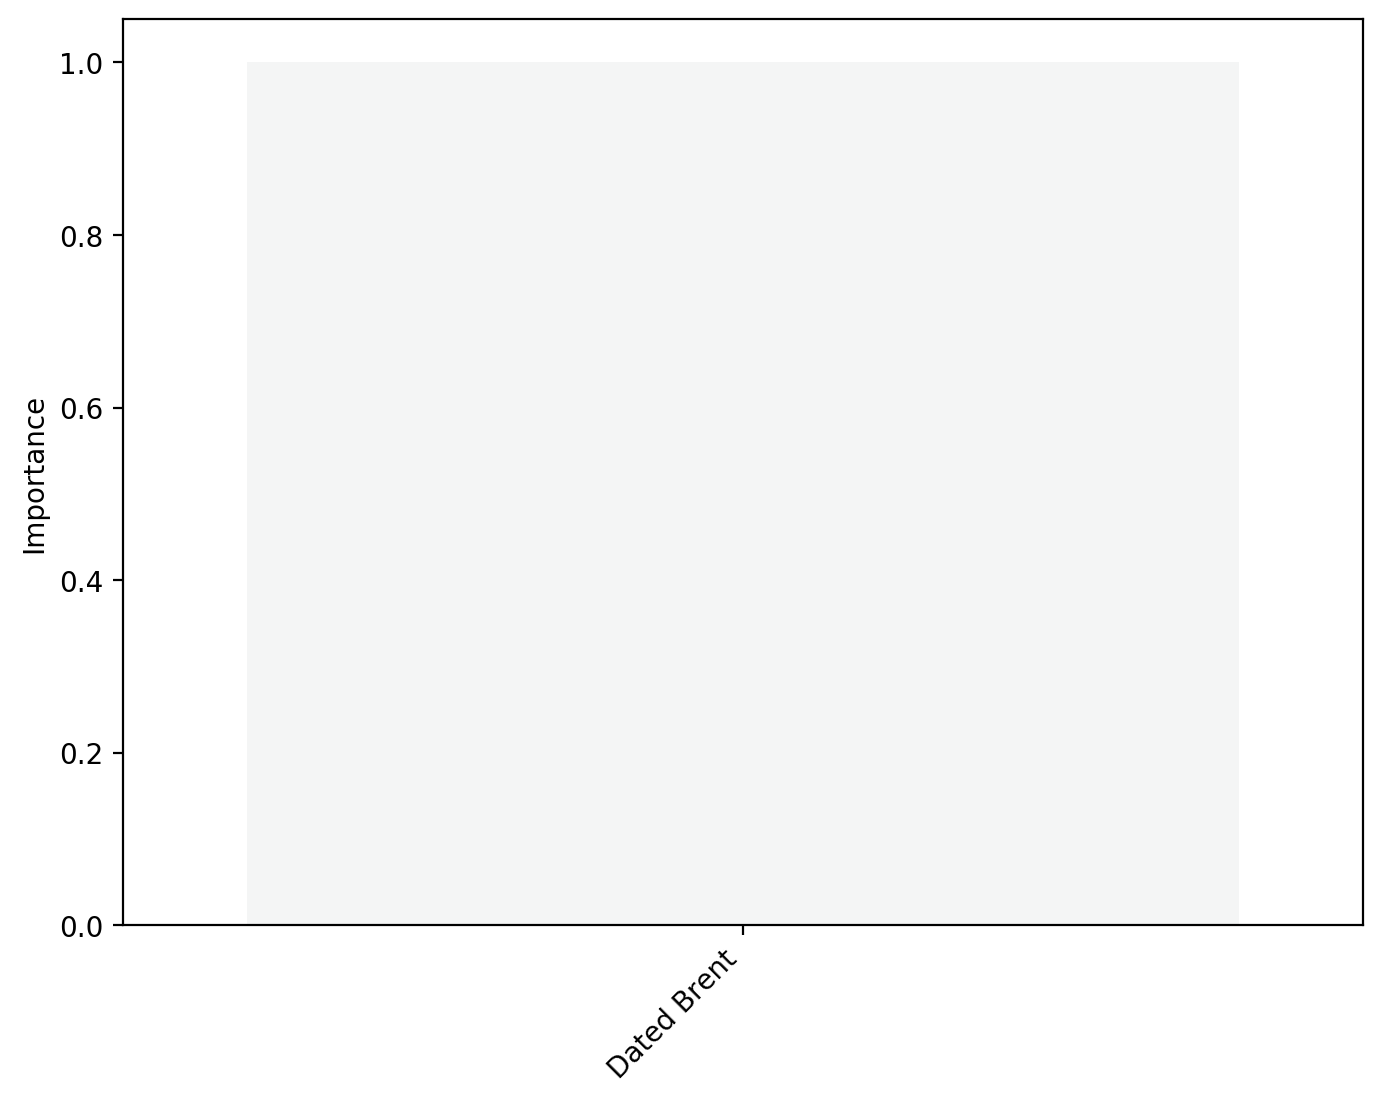

In [45]:
train_combi = combi.iloc[:-100:,1:]
test_combi = combi.iloc[-100:,1:]

plt.rcParams['figure.dpi'] = 200

#x_train=train_combi.drop("Maya Europe",axis=1)
#x_train=train_combi[train_combi.columns.difference(["Mars"])]
x_train=train_combi[["Dated Brent"]]
y_train=train_combi["Bonny light"]

#df.drop('b', axis=1)

#x_test=train_combi.drop("Maya Europe",axis=1)
#x_test=test_combi[test_combi.columns.difference(["Mars"])]
x_test=test_combi[["Dated Brent"]]
y_test=test_combi["Bonny light"].to_frame()



regressor = RandomForestRegressor(n_estimators=200, max_depth=5)

clf=regressor.fit(x_train, y_train)

y_pred=regressor.predict(x_test)
y_pred=pd.DataFrame(y_pred)


plt_train=plt.scatter(x_train["Dated Brent"],y_train,   color='grey')
plt_test=plt.scatter(x_test["Dated Brent"],y_test,   color='green')
plt_pred=plt.scatter(x_test["Dated Brent"], y_pred,  color='black')



plt.xlabel("Dated Brent")
plt.ylabel("Bonny light")
plt.legend((plt_train, plt_test,plt_pred),("train data", "test data","prediction"))
plt.show()

print("Mean squared error: %.2f"
      % np.mean((regressor.predict(x_train) - y_train) ** 2))

import seaborn as sns
importances=regressor.feature_importances_

indices=list(x_train)
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("Feature %s (%f)" % (indices[f], importances[f]))

f, (ax1) = plt.subplots(1, 1, figsize=(8, 6), sharex=True)
sns.barplot(indices, importances, palette="BrBG", ax=ax1)
ax1.set_ylabel("Importance")

ax1.set_xticklabels(
    ax1.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);




In [46]:
data_df = price[['Dated brent']]
y_pred=regressor.predict(data_df)
y_pred= pd.DataFrame(y_pred)
print(y_pred)

          0
0  2.647059
1  3.040361
2  3.035700
3  3.035700
4  1.494619
5  1.574939


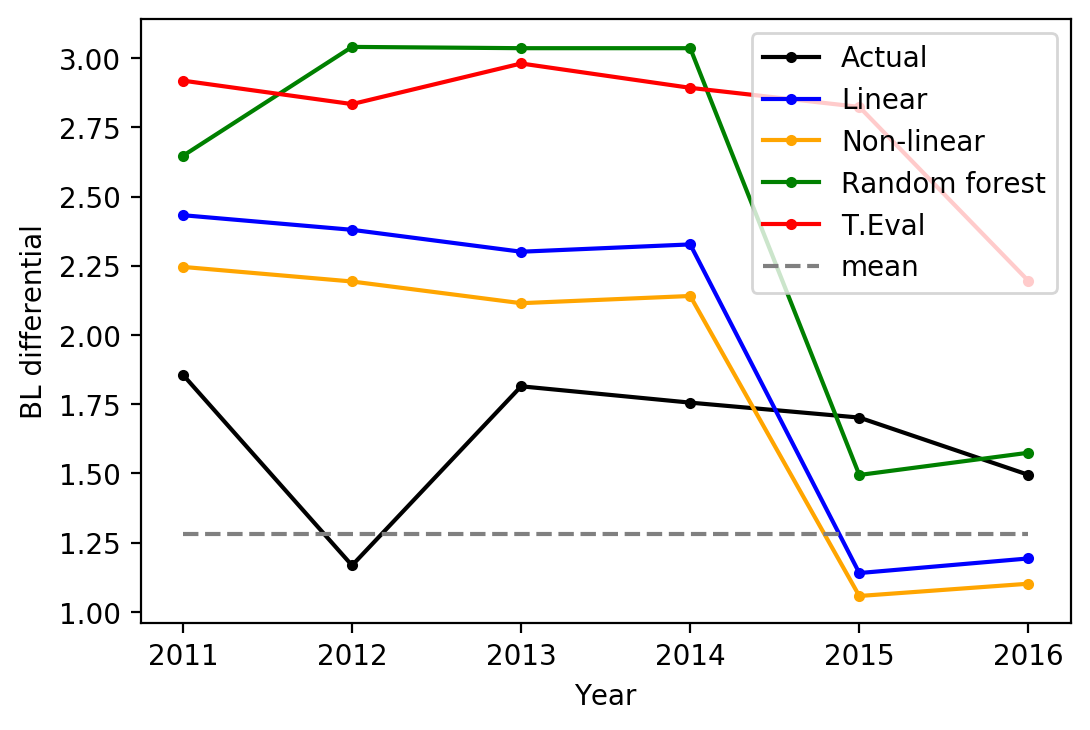

In [81]:
plt.plot(price["Year"],price["Actual BL"],'k.-')
plt.plot(price["Year"],linear_BL,'b.-')
plt.plot(price["Year"],nonlinear_BL,'.-',color ='orange')
plt.plot(price["Year"],y_pred,'g.-')
plt.plot(price["Year"],price["TE BL"],'r.-')
plt.plot([price["Year"].iloc[0],price["Year"].iloc[-1]],[1.28,1.28],'--',color='grey')
plt.xlabel('Year')
plt.ylabel('BL differential')
plt.legend(("Actual","Linear","Non-linear","Random forest","T.Eval","mean"))

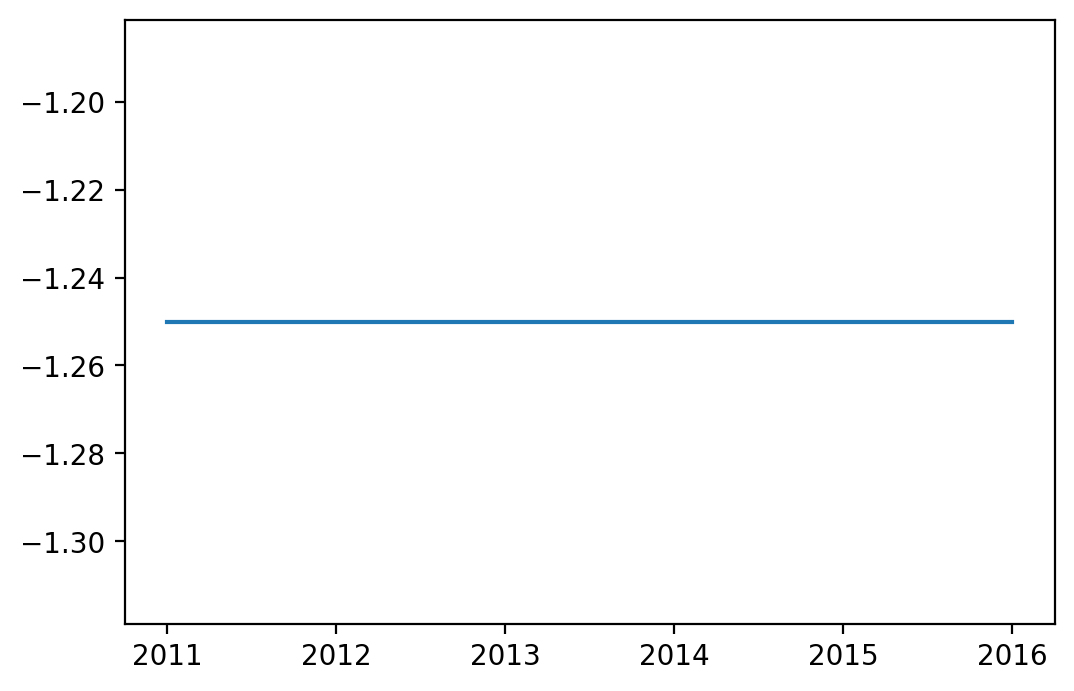

In [77]:
plt.plot([price["Year"].iloc[0],price["Year"].iloc[-1]],[-1.25,-1.25])


In [73]:
price["Year"].iloc[1]

2012

In [82]:
price.drop(["Actual Dubai","TE Dubai","Actual WTI","TE WTI"],axis=1)

,Year,Dated brent,Butane,VGO 0.5%,Jet Oil,Gasoil,FO 1%,FO 3.5%,Actual BL,TE BL
0,2011,112,-29.0,3.47,16.92,13.98,-10.86,-16.83,1.856394,2.918570
1,2012,110,-32.0,5.00,17.00,15.00,-4.00,-11.00,1.168056,2.833835
2,2013,107,-32.4,4.90,19.70,17.10,-5.50,-12.10,1.814802,2.980453
3,2014,108,-34.0,6.00,15.00,14.00,-9.00,-19.00,1.755830,2.892560
4,2015,63,-29.0,1.00,19.00,16.00,-12.00,-16.00,1.701897,2.823652
5,2016,65,-14.6,2.00,12.50,10.50,-10.50,-14.50,1.495079,2.195386
